In [1]:
import pandas as pd
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


I am analzying a dataset that has around 11,562 unique values, 12 different Genre and their sales in North America, European Union, Japan, Other sales and Total Gloabl sale and User Count for those games.

In [2]:
df["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Converting the value of year in terms of decades

In [7]:
bins= [1980,1990,2000,2010,2020]

In [8]:
df['Decade'] = pd.cut(x=df['Year_of_Release'], bins=bins,labels=[1990,2000,2010,2020])

### Analyzing just the years from 2001 to 2020

This is done in order to analyze the current trends in gaming industry

In [31]:
array=[2010,2020]

In [32]:
df_latest=df[df.Decade.isin(array)]
df_latest.shape

(14124, 17)

In [26]:
df_old=df[~df.Decade.isin(array)]
df_old.shape

(2595, 17)

Thus we are just omiting 2595 values which are before 2001

### We have around 14,124 games that we are analyzing of various catergories

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

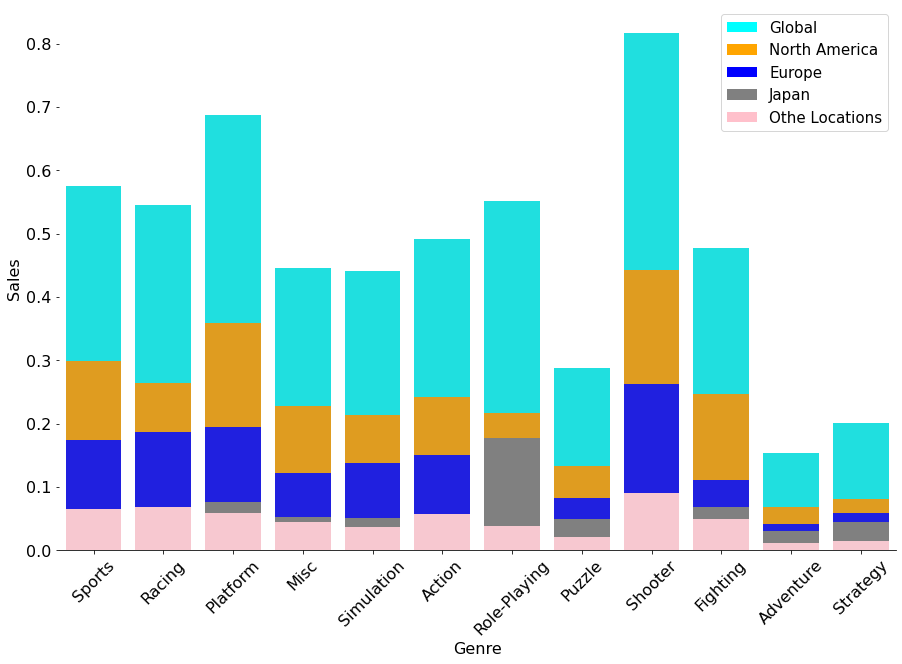

In [17]:
plt.figure(figsize=(15,10))
#Ploting
Global_sales_plot=sns.barplot(x = df_latest.Genre, y = df_latest.Global_Sales, color = "cyan",ci=None)
NA_Sales_plot=sns.barplot(x =  df_latest.Genre, y = df_latest.NA_Sales, color = "orange",ci=None)
EuSale_plot = sns.barplot(x = df_latest.Genre, y = df_latest.EU_Sales, color = "Blue",ci=None)
JapanSale_plot = sns.barplot(x =  df_latest.Genre, y = df_latest.JP_Sales, color = "grey",ci=None)
OtherSale_plot=sns.barplot(x =  df_latest.Genre, y = df_latest.Other_Sales, color = "pink",ci=None)

#Legend
Global_sales=plt.Rectangle((0,0),1,1,fc="cyan")
NA_Sales=plt.Rectangle((0,0),1,1,fc="orange")
EuSale = plt.Rectangle((0,0),1,1,fc="Blue")
JapanSale = plt.Rectangle((0,0),1,1,fc='grey')
OtherSale=  plt.Rectangle((0,0),1,1,fc='pink')
l = plt.legend([Global_sales,NA_Sales,EuSale, JapanSale,OtherSale], ['Global',
                                                           "North America",
                                                           "Europe",
                                                           'Japan', 'Othe Locations'], loc=0, ncol = 1, prop={'size':15})
# l.draw_frame(False)
sns.despine(left=True)
Global_sales_plot.set_ylabel("Sales")
Global_sales_plot.set_xlabel("Genre")
Global_sales_plot.set_xticklabels(Global_sales_plot.get_xticklabels(), rotation=45, size=16, ha='center')
for item in ([Global_sales_plot.xaxis.label, Global_sales_plot.yaxis.label] +
             Global_sales_plot.get_xticklabels() + Global_sales_plot.get_yticklabels()):
    item.set_fontsize(16)
#     Global_sales_plot.set_xticklabels(Global_sales_plot.get_xticklabels,rotation=45)
plt.show()

In [19]:
def HeatMap(df,name):
    import seaborn as sns
    df_num_featuers=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales',
                  'Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']]
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    df_num_featuers=df_num_featuers.corr()
    sns.heatmap(df_num_featuers,annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

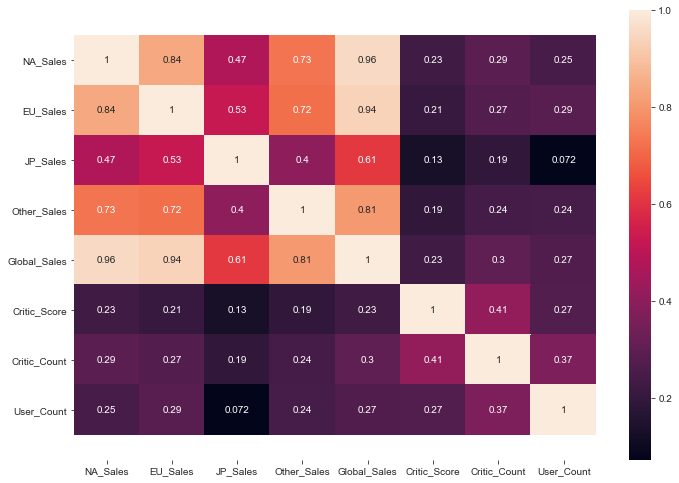

In [21]:
df_latest=df_latest.dropna()
df_sales=df_latest[['NA_Sales','EU_Sales','JP_Sales','Other_Sales',
                  'Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']]
HeatMap(df_sales,'sales')

#### The below graphs are not included the report but worth exploring

<Figure size 720x720 with 0 Axes>

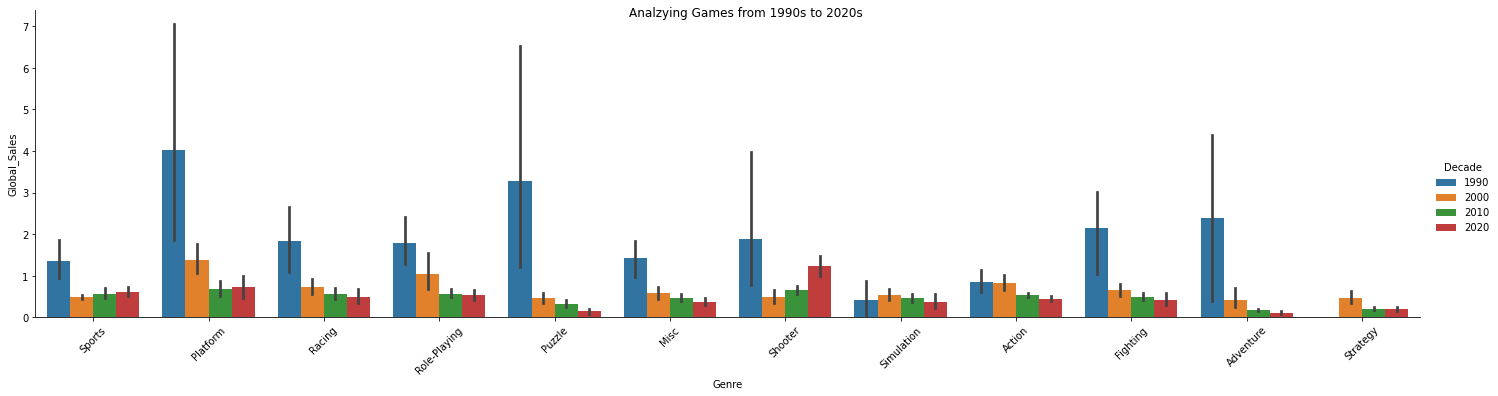

In [14]:
plt.figure(figsize=(10,10))
ax=sns.catplot(x="Genre", y="Global_Sales", data=df,kind='bar',aspect=4,hue='Decade')
ax.set_xticklabels(rotation=45)
ax.fig.suptitle("Analzying Games from 1990s to 2020s")
plt.show()

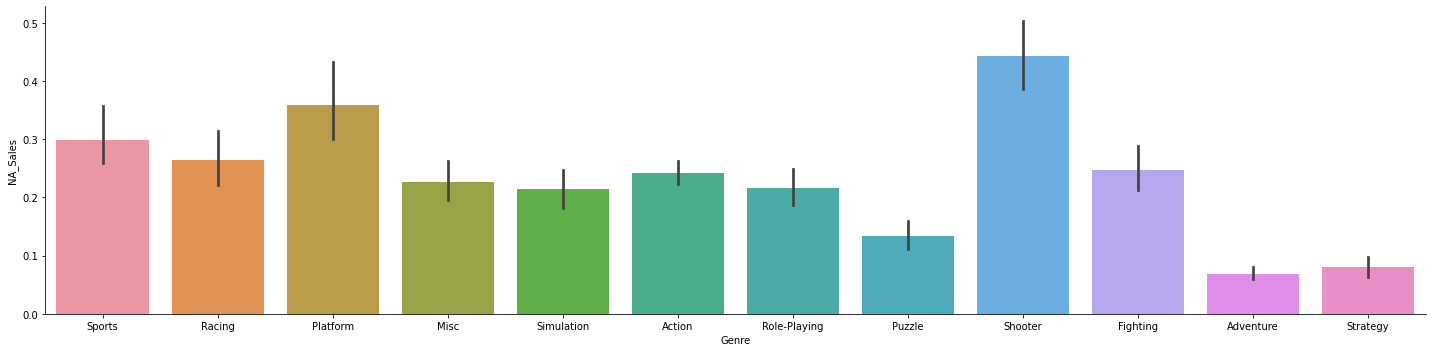

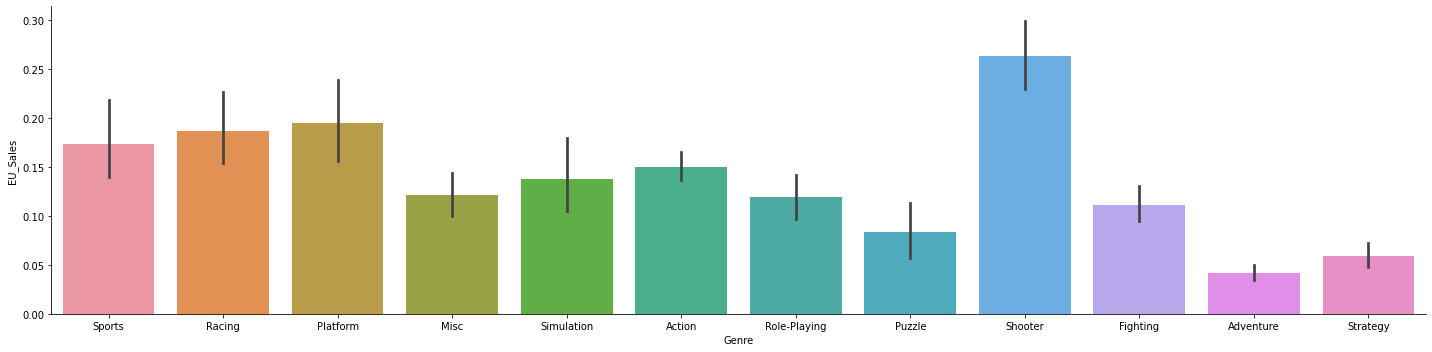

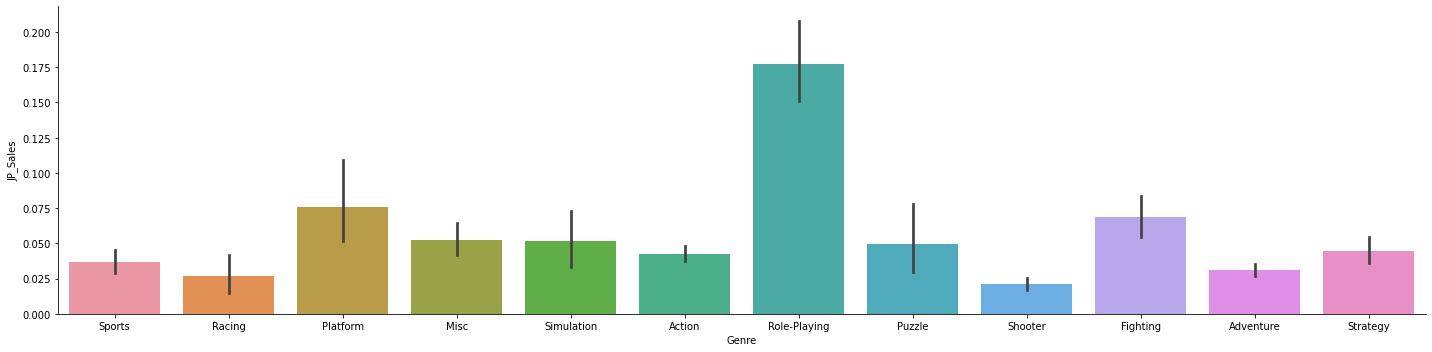

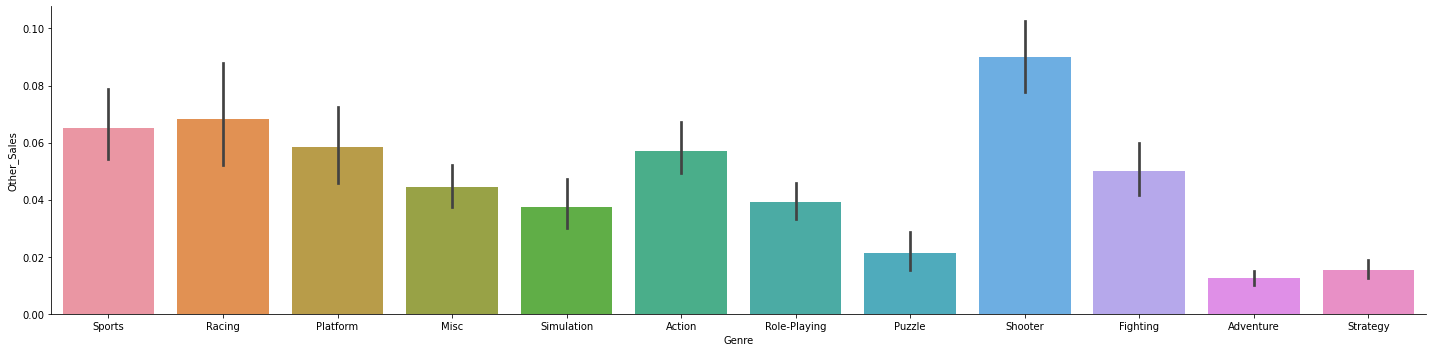

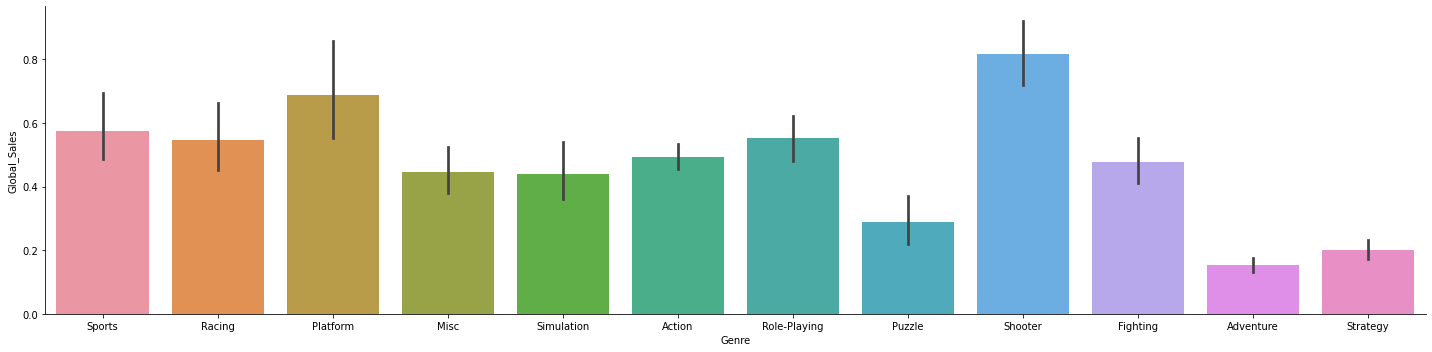

In [16]:
column_name=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i in range(len(column_name)):
    ax=sns.catplot(x="Genre", y=column_name[i], data=df_latest,kind='bar',aspect=4)